In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from data import MePicsSet
from display import show_keypoints
import torch
from torch.utils.data import DataLoader
from learn import test
import numpy as np
import morph, utils
from pathlib import Path

In [3]:
OUT_DIR = Path("output")

In [4]:
april_dataset = MePicsSet()
april_loader = DataLoader(april_dataset, batch_size=8, shuffle=False)

In [5]:
april_dataset.samples[0].get_crop_box()

(810, 54, 287, 287)

In [6]:
april_dataset.samples[0].get_cropped_img()

array([[[0.17647059, 0.18039216, 0.2       ],
        [0.22352941, 0.22745098, 0.24705882],
        [0.23921569, 0.24313725, 0.2627451 ],
        ...,
        [0.72941176, 0.61176471, 0.4       ],
        [0.7254902 , 0.60784314, 0.39607843],
        [0.7254902 , 0.60784314, 0.39607843]],

       [[0.18039216, 0.17647059, 0.19607843],
        [0.22745098, 0.23137255, 0.25098039],
        [0.2745098 , 0.27843137, 0.29803922],
        ...,
        [0.7254902 , 0.60784314, 0.39607843],
        [0.7254902 , 0.60784314, 0.39607843],
        [0.72156863, 0.60392157, 0.39215686]],

       [[0.18431373, 0.18039216, 0.2       ],
        [0.22745098, 0.23137255, 0.24705882],
        [0.28235294, 0.28627451, 0.30588235],
        ...,
        [0.7254902 , 0.60784314, 0.39607843],
        [0.72156863, 0.60392157, 0.39215686],
        [0.72156863, 0.60392157, 0.39215686]],

       ...,

       [[0.02352941, 0.06666667, 0.09019608],
        [0.02745098, 0.0627451 , 0.09019608],
        [0.01960784, 0

In [7]:
model3 = torch.load(OUT_DIR / "model3.pt", map_location="cpu")
april_imgs, april_preds = test(april_loader, model3)

100%|██████████| 2/2 [00:02<00:00,  1.26s/it]


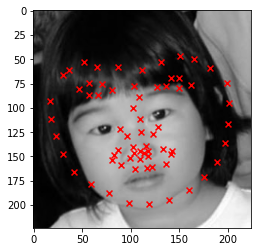

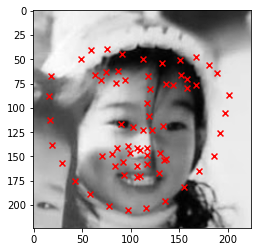

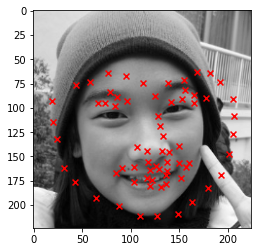

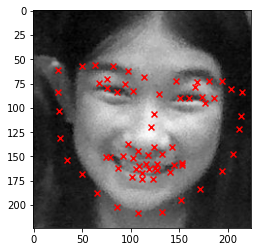

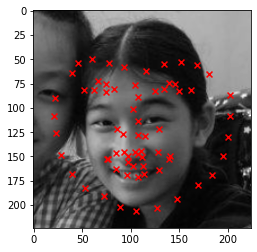

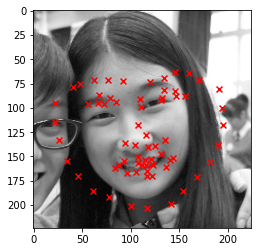

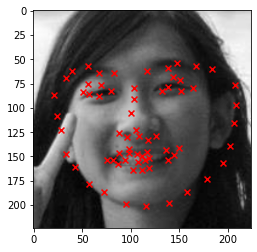

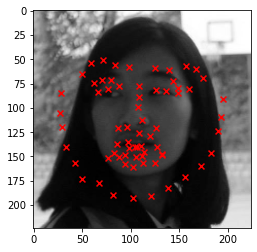

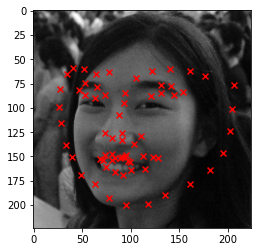

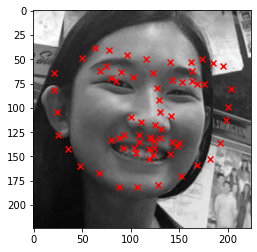

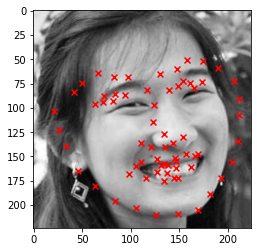

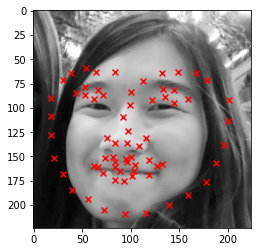

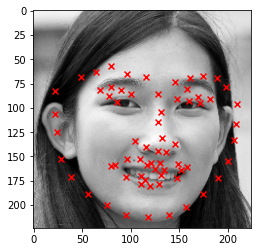

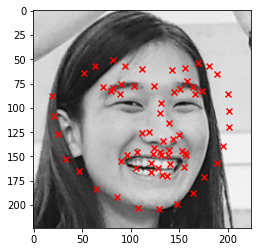

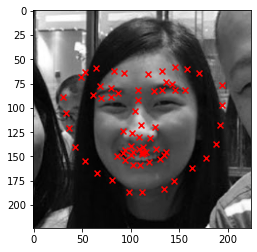

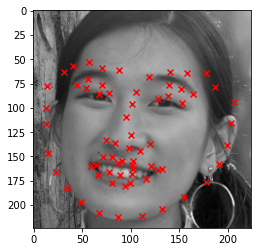

In [8]:
for i, p in zip(april_imgs, april_preds):
    show_keypoints(image=i, truth_points=None, pred_points=p)

In [9]:
morph_imgs = []
morph_pts = []
corners = np.array([[0, 0], [0, 499], [499, 0], [499, 499]])
for i in range(len(april_dataset)):
    tmp = april_dataset.get_color_img(i, cropped=True)
    print(tmp.shape)
    im = utils.to_img_arr(april_dataset.get_color_img(i, cropped=True))
    morph_imgs.append(im)
    print(im.shape)

    pred_pts = utils.to_points(april_preds[i])
    pred_pts = april_dataset.get_color_pts(i, pred_pts, cropped=True)
    pts = np.vstack((pred_pts, corners))
    morph_pts.append(pts)

    show_keypoints(im, pts, color=True)


middle, _, _ = morph.compute_middle_object(
    morph_imgs[0], morph_imgs[1], morph_pts[0], morph_pts[1], alpha=0.5
)
plt.imshow(middle)

(287, 287, 3)
(287, 287, 3)


AssertionError: <class 'numpy.ndarray'>

In [ ]:
filename = OUT_DIR / f"morph_{time.time()}.mp4"

me1, me2 = morph_imgs[0], morph_imgs[1]
pts1, pts2 = morph_pts[0], morph_pts[1]
# morph.compute_middle_object(me1, me2, pts1, pts2, alpha=0.5)
# morph.compute_morph_video(me1, me2, pts1, pts2, filename)